## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

- I will choose to go with stastical approach with this kind of problem as we are predicting here range of numbers so it would be good if we analyze our data with central tendancies such as mean, std and other descriptive values.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

- Firstly , We need ofcourse our taget variable which is the wine quality and talking about the features then we need some relavent properties or characteristics which effects ultimately the wine quality, for that we may need the physiochemical properties of the wine in our dataset as features, which we will use as to fit our model and predict the wine quality.

### Data Collection

**Q3. From where do we get our data?**
- I generally look up into open source platforms which provides the datasets of various kind of applications such as kaggle and other ML Repos available on the internet, still if we face difficulty to find it then we have to scrap or mine our data from the various kind of sources such as websites related to our application in this case the websites of comapanies who sales great quality of wine and believes in sharing the data for either advertisment purpose or for information purpose to give insides of their wines. Lastly, if still we struggle with this then ultimately we have to contact wine company to gathered the data from physical sensors to derive it's physiochemical properties.

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

- Red wine samples are obtained from the Minho province located in north of portugal.

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

- Knowing the positice or negative effect of each variable on the quality of wine helps in many way to wine industry, for instance if consider from the producers perspective then they can use this insights to adjust their wine making process to improve the quality of their wine, which includes the cost-optimization as well. Also, another party envolved at the end of the supply chain is distributors, for them having knowledge of significant impact of individual variable on the wine quality helps them to adjust their supply chain settings including transportation and storage conditions for different test profiles of wines according to its quality.


In [40]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Reading the dataset available in same path folder
wine_qlty = pd.read_excel("winequality-red.xlsx")

warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [5]:
# Top 5 rows of dataset
wine_qlty.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# See info about data that how many rows are there and what are the datatypes of each features
wine_qlty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [39]:
# Lets see the summary of statistics for each feature column
wine_qlty.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.167065,0.522721,0.249522,2.199005,0.078571,14.966169,42.498507,0.996562,3.322905,0.630149,10.369900,5.616915
std,1.266883,0.143298,0.156148,0.387753,0.012895,7.575095,22.920996,0.001379,0.113656,0.098588,0.841949,0.626790
min,5.100000,0.120000,0.000000,1.200000,0.039000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.300000,0.430000,0.140000,2.000000,0.073000,10.000000,27.000000,0.995900,3.270000,0.570000,9.700000,5.000000
50%,8.167065,0.522721,0.249522,2.199005,0.078571,14.966169,42.498507,0.996562,3.322905,0.630149,10.369900,5.616915
75%,8.600000,0.590000,0.330000,2.300000,0.083000,17.000000,48.000000,0.997200,3.380000,0.660000,10.700000,6.000000
max,12.300000,1.010000,0.730000,3.650000,0.122000,42.000000,124.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [38]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.167065,0.522721,0.249522,2.199005,0.078571,14.966169,42.498507,0.996562,3.322905,0.630149,10.369900,5.616915
std,1.266883,0.143298,0.156148,0.387753,0.012895,7.575095,22.920996,0.001379,0.113656,0.098588,0.841949,0.626790
min,5.100000,0.120000,0.000000,1.200000,0.039000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.300000,0.430000,0.140000,2.000000,0.073000,10.000000,27.000000,0.995900,3.270000,0.570000,9.700000,5.000000
50%,8.167065,0.522721,0.249522,2.199005,0.078571,14.966169,42.498507,0.996562,3.322905,0.630149,10.369900,5.616915
75%,8.600000,0.590000,0.330000,2.300000,0.083000,17.000000,48.000000,0.997200,3.380000,0.660000,10.700000,6.000000
max,12.300000,1.010000,0.730000,3.650000,0.122000,42.000000,124.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [8]:
# Dimension of our data
wine_qlty.shape

(1599, 12)

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [9]:
# Find if are there any missing data
wine_qlty.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#Lets see if we have any duplicated raws with the same data
wine_qlty[wine_qlty.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [11]:
#Lets get rid of the duplicates by droping the entire raws and keeping just the fist occurance of duplicates.
wine_qlty.drop_duplicates(inplace=True)

In [12]:
wine_qlty.shape

(1359, 12)

# Exploratory Data Analysis


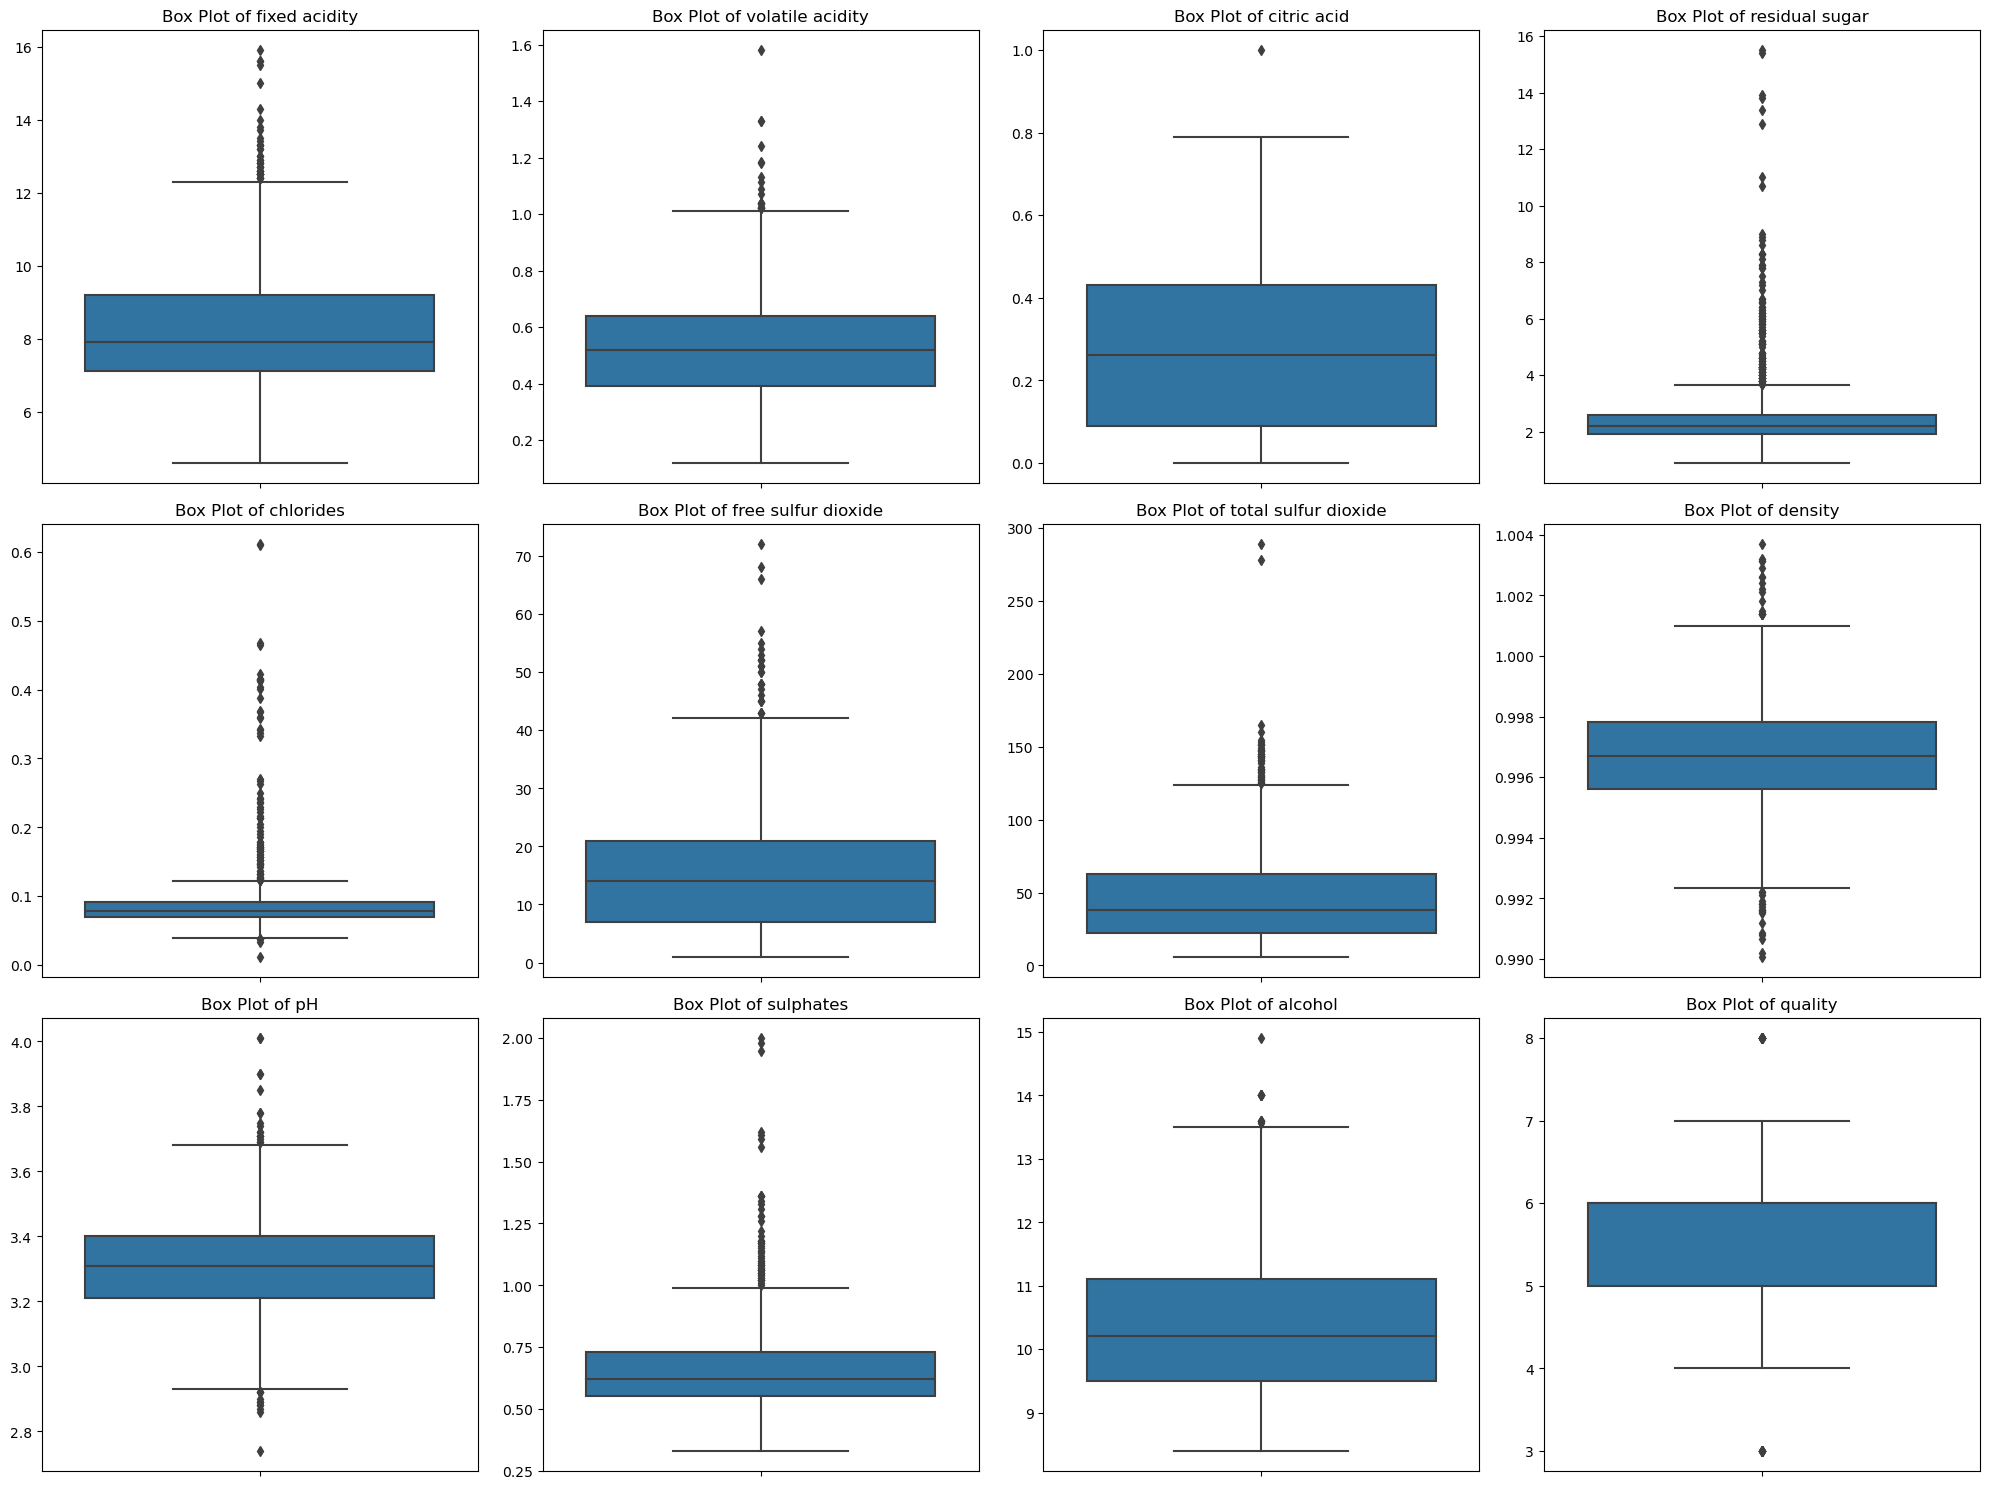

In [14]:
# Lets see first boxplot of each column to an idea of any visible outliers

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
axes = axes.flatten()



for i, column in enumerate(wine_qlty.columns):
    sns.boxplot(y=wine_qlty[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel('')  # Optionally remove y-axis label

    
plt.tight_layout()
plt.show()

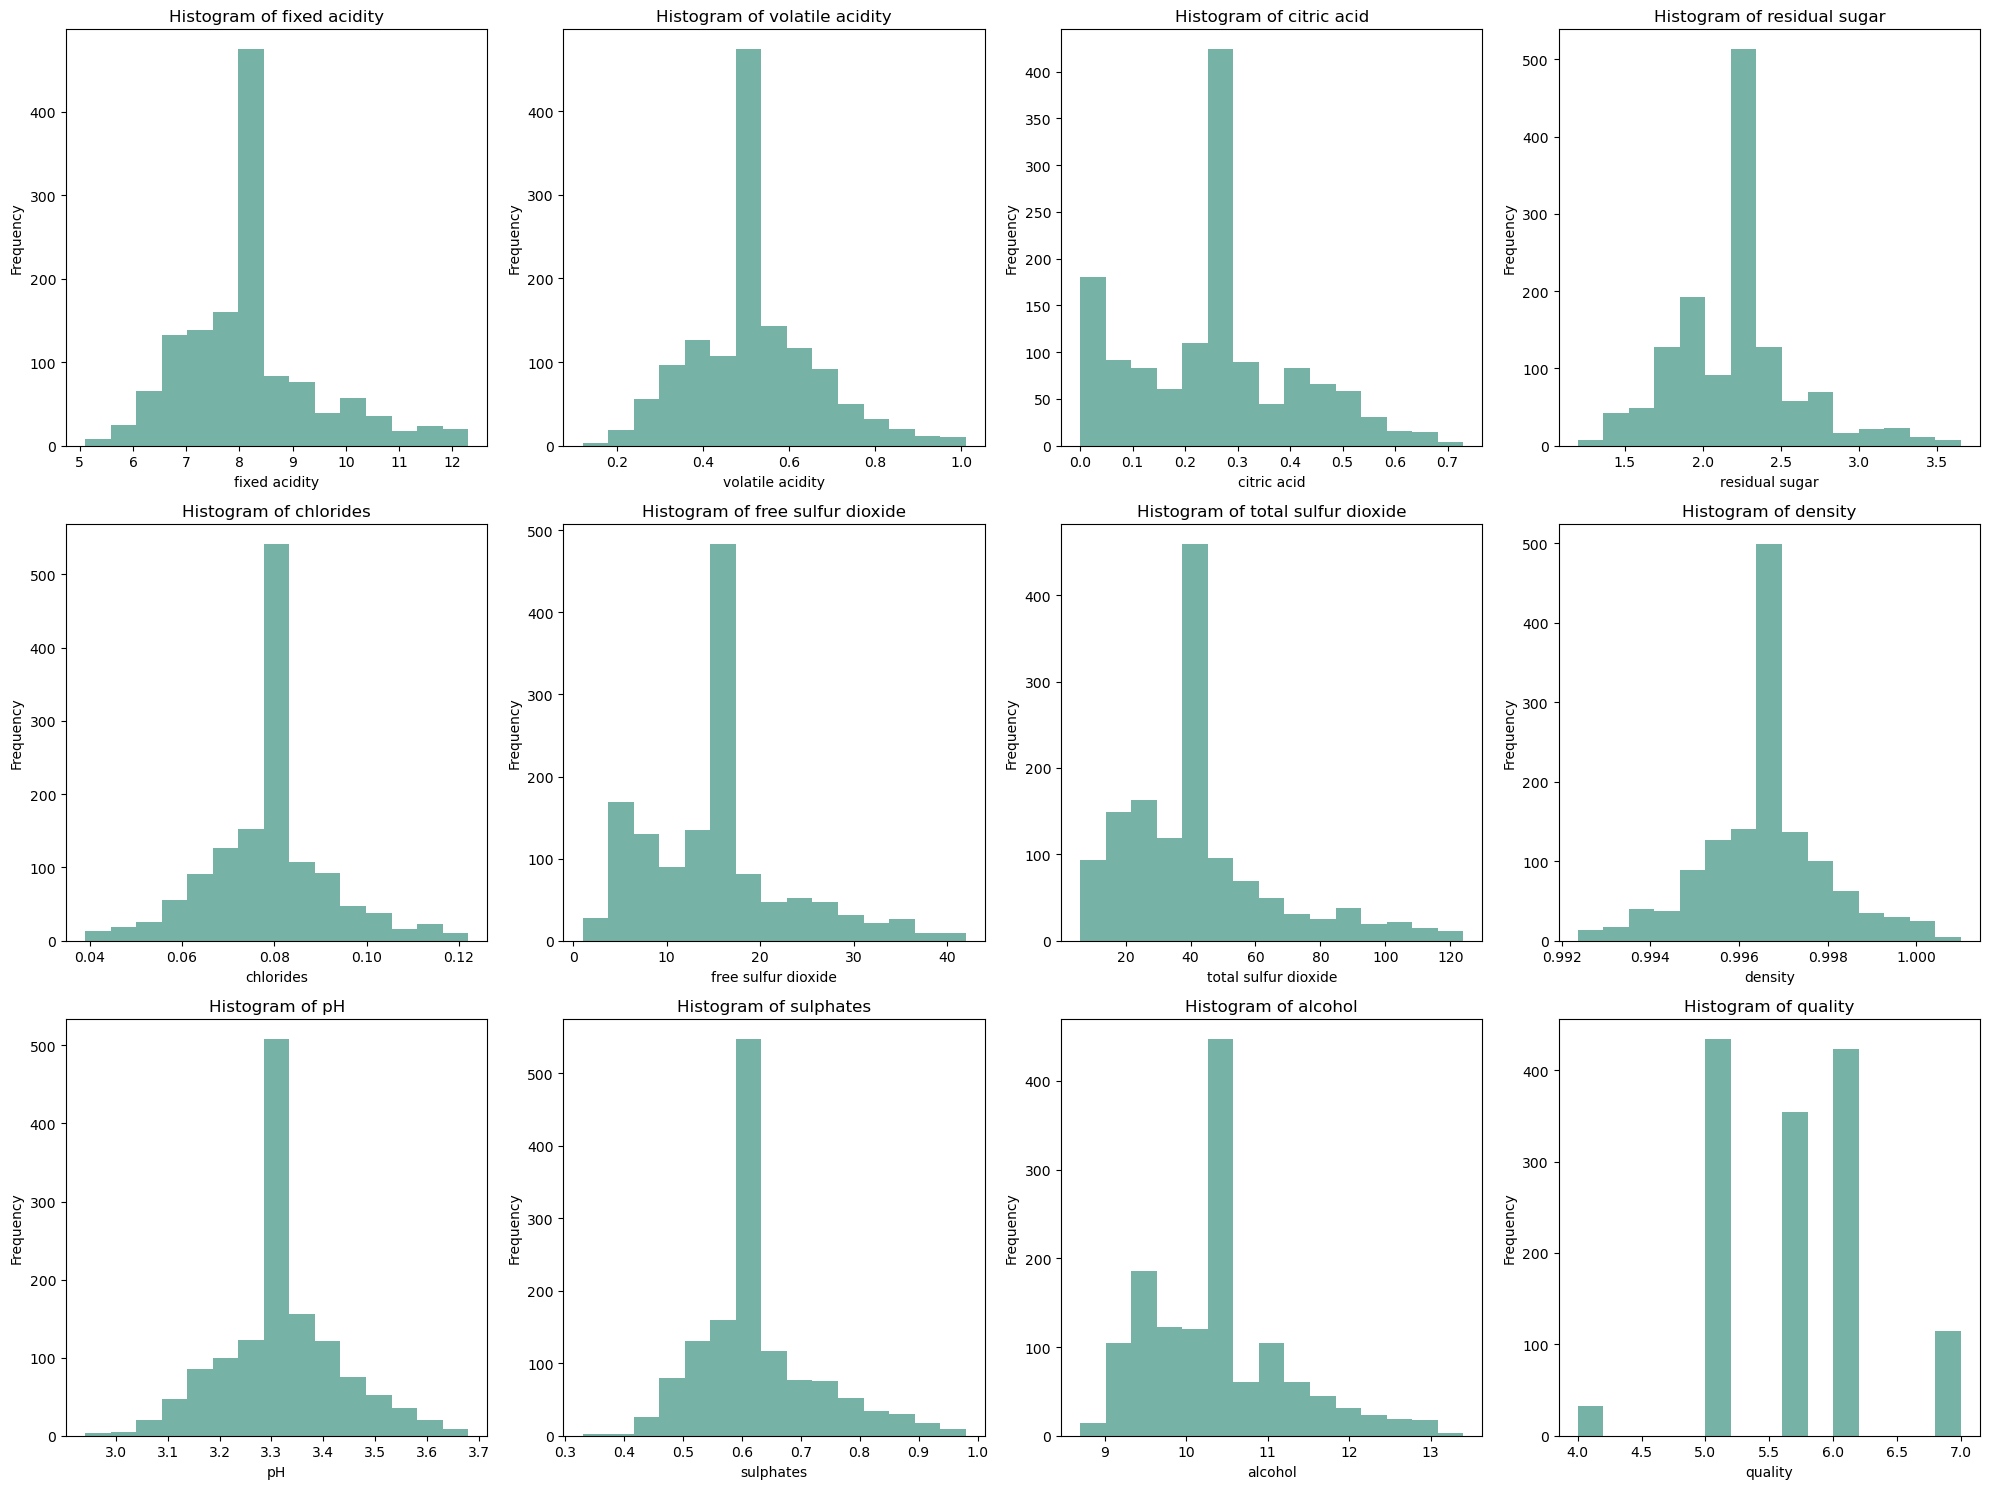

In [155]:
# Analyzing the distribution of data using histogram

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,15))
axes = axes.flatten()

# Iterate through the columns and create individual histograms
for i, column in enumerate(wine_qlty.columns):
    axes[i].hist(wine_qlty[column], bins=15, color='#76b3a6')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation of features')

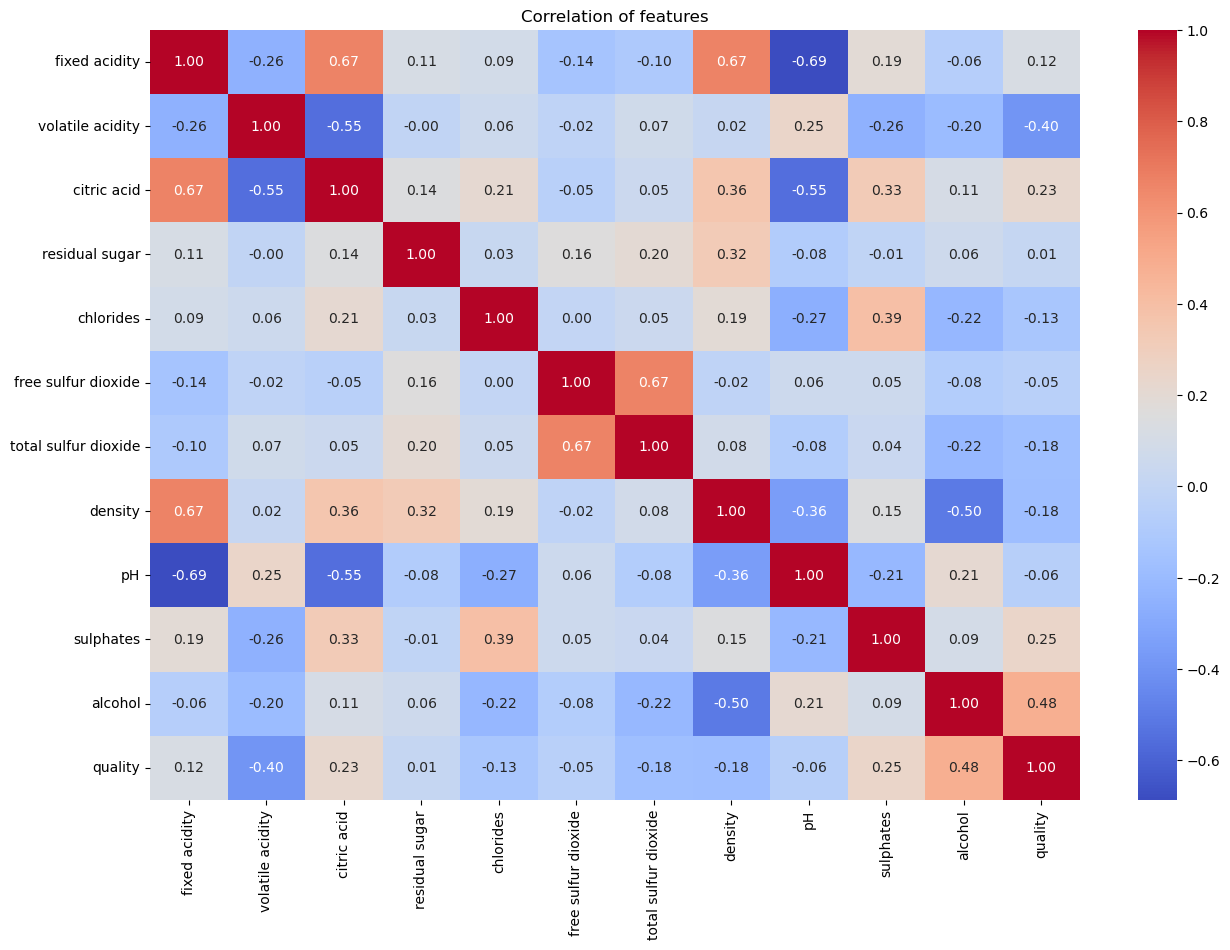

In [17]:
# Plot heatmap to see features correlation to each other and get an idea of relavancy

plt.figure(figsize=(15,10))
sns.heatmap(data=wine_qlty.corr(), annot=True, cmap="coolwarm", fmt= ".2f")
plt.title("Correlation of features")

# Handling Outliers 

As per our visulization through boxplot of each features we expect that there ara significant amount of outliers that needed to be imputed with another value with the range

Let's first seperate our target column of wine quality because it's already have define range of 0 to 10 and not needed to be taken into consideration for detecting outliers.

In [114]:
wine_qlty = pd.read_excel("winequality-red.xlsx")
wine_qlty.drop_duplicates(inplace=True)

In [156]:
X = wine_qlty.drop(columns ="quality")
Y = wine_qlty["quality"]

Trying out 2 methods for outliers detection and will keep whichever will be the best for our model evaluation and remaining will be commented out.
1. Z- score
2. IQR

In [45]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
std,1.252052,0.141007,0.154066,0.378612,0.012292,7.549483,22.414646,0.001368,0.113103,0.099680,0.827638,0.619254
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.300000,0.430000,0.135000,2.000000,0.074000,10.000000,27.000000,0.995900,3.270000,0.570000,9.700000,5.000000
50%,8.162002,0.523066,0.246760,2.185411,0.078586,15.020356,42.268024,0.996584,3.324623,0.631264,10.350792,5.623410
75%,8.500000,0.590000,0.320000,2.300000,0.083000,17.000000,48.000000,0.997200,3.380000,0.660000,10.700000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


In [46]:
y.describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

## Detecting the outliers by their Z-score and imputing them with the mean value.

In [83]:
# # First find out the z-score of each data point to figure out how much its deviated from the mean
# # Basically how far the data point from column's average value
# z_scores = np.abs(stats.zscore(X))
# print(f'Total number of outliers are {(z_scores>=3).sum()}')

Total number of outliers are fixed acidity            9
volatile acidity         9
citric acid              1
residual sugar          28
chlorides               27
free sulfur dioxide     18
total sulfur dioxide    12
density                 13
pH                       8
sulphates               21
alcohol                  7
dtype: int64


In [84]:
# # After detecting the number of outliers we will not remove them otherwise our dataset will become smaller, rather than
# # We will impute them with mean value of their respective column

# for col in X.columns:
#     feature_mean = X[~(z_scores>=3)][col].mean()
#     X.loc[(z_scores>=3)[col], col] = feature_mean


## Detecting the outliers by IQR (Interquartile Range) method and imputing them with the mean value.

In [157]:
# Q3 and Q1 denotes the quartile range for each feature column with multipliation of 1.5 basically we defined the range outside
# Which our outliers falls

Q3 = X.quantile(0.75)
Q1 = X.quantile(0.25)
IQR =  Q3-Q1

# Identify outliers
outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)

# Display the number of outliers
print(f"Number of outliers in each feature column: {outliers.sum()}" )

Number of outliers in each column: 639


In [158]:
# Iterating through every feature column and imputing outliers with their respective column mean value
for col in X.columns:
    feature_mean = X[~outliers][col].mean()
    X.loc[outliers, col] = feature_mean


### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [126]:
# Spliting our dataset into training and test data with 80:20 ratio

# X = wine_qlty.drop(columns ="quality")
# Y = wine_qlty["quality"]

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [161]:
# Linerar Regression model to fit our training data and their metrics

lr = LinearRegression()

lr.fit(x_train,y_train)

pred = lr.predict(x_test)

print(f'R2 Score is {r2_score(y_test,pred)}')
print(f'Mean absolute error is {mean_absolute_error(y_test,pred)}')      
print(f'RMS is {np.sqrt(mean_squared_error(y_test,pred))}') 

R2 Score is 0.4129492593513452
Mean absolute error is 0.33614293246891325
RMS is 0.4780810051848704


In [162]:
# Ridge regression model to fit training data and their metrics

ridge = Ridge(alpha=1.0)
ridge.fit(x_train,y_train)

pred = ridge.predict(x_test)

print(f'R2 Score is {r2_score(y_test,pred)}')
print(f'Mean absolute error is {mean_absolute_error(y_test,pred)}')      
print(f'RMS is {np.sqrt(mean_squared_error(y_test,pred))}') 

R2 Score is 0.4125111159369774
Mean absolute error is 0.336939189573267
RMS is 0.4782593790119388


*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>


## For both the models error values are the same and R2 score as well which suggest that with that value they still have some unexplained variance into their target variable so for this dataset we can choose either model.


### Model Evaluation

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

To get the idea about each feature importance on our target variable we will refer the repective model coefficients associated with indidual features.

In [163]:
# Feature importance for the ridge regression model.

coefficients = ridge.coef_

# Taking the absolute values of coefficients as feature importance scores
feature_importances = np.abs(coefficients)

# We will store them in our dataset so we can easily sort and visulize them
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sorting the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
9,sulphates,1.438692
1,volatile acidity,0.718151
8,pH,0.533241
4,chlorides,0.298454
10,alcohol,0.290517
2,citric acid,0.224695
3,residual sugar,0.062279
0,fixed acidity,0.010029
7,density,0.005763
5,free sulfur dioxide,0.004936


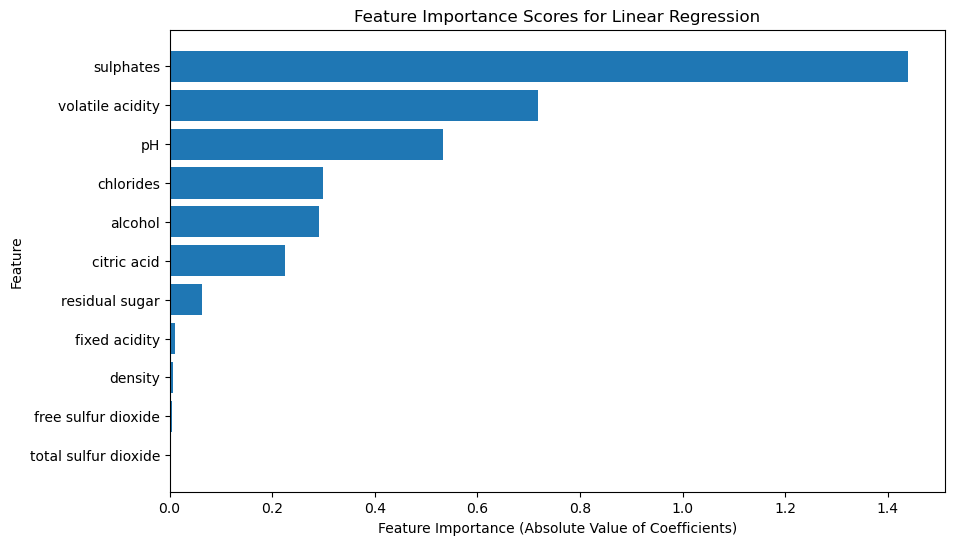

In [164]:
# Bar graph to visulize individual feature importance

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance (Absolute Value of Coefficients)')
plt.ylabel('Feature')
plt.title('Feature Importance Scores for Linear Regression')
plt.gca().invert_yaxis()  
plt.show()

In [165]:
# same procedure for linear regressor 

coefficients = lr.coef_

feature_importances = np.abs(coefficients)

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df


,Feature,Importance
7,density,4.827149
4,chlorides,2.273485
9,sulphates,1.628573
1,volatile acidity,0.728836
8,pH,0.628071
2,citric acid,0.286660
10,alcohol,0.275043
3,residual sugar,0.039381
0,fixed acidity,0.011499
5,free sulfur dioxide,0.004273


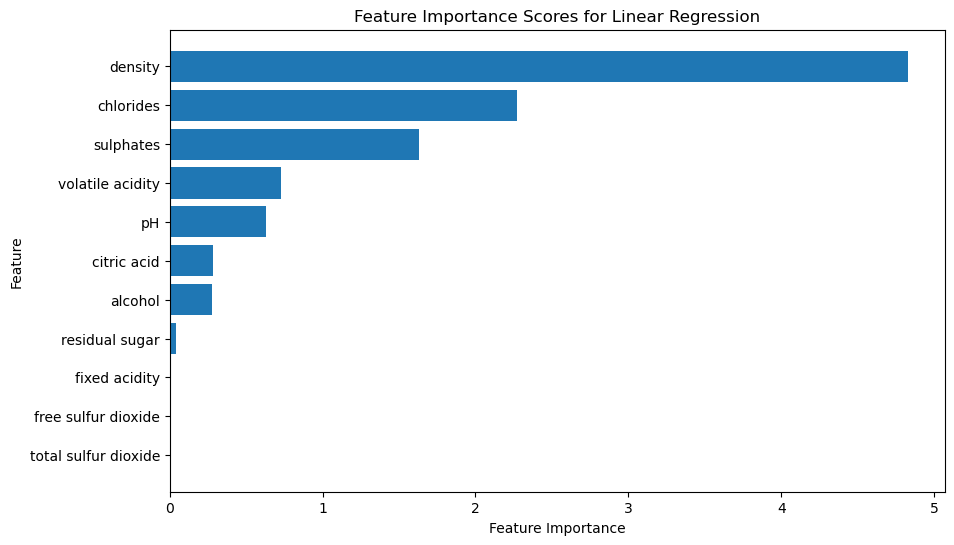

In [166]:
# Bar graph

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Scores for Linear Regression')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

### Conclusion

*TODO*

## For both the model we find some similiar features that have significant importance in model fitting and prediction such as  Sulphates, PH, Volatile acidity and Chlorides